In [1]:
import pandas as pd


json_file_path = 'data/pii-detection-removal-from-educational-data/train.json'
train_df = pd.read_json(json_file_path)

train_df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [2]:
# drop irrelevant cols
cols_to_drop = ['full_text', 'trailing_whitespace']
train_df = train_df.drop(columns=cols_to_drop, axis=1)
train_df

,document,tokens,labels
0,7,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,"[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,"[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."
...,...,...,...
6802,22678,"[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6803,22679,"[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6804,22681,"[Challenge, \n\n, So, ,, a, few, months, back,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6805,22684,"[Brainstorming, \n\n, Challenge, &, Selection,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [3]:
# create len tokens column
train_df['number of tokens'] = train_df.tokens.apply(len)
train_df

,document,tokens,labels,number of tokens
0,7,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",753
1,10,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",563
2,16,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...",729
3,20,"[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...",1071
4,56,"[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...",1927
...,...,...,...,...
6802,22678,"[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",601
6803,22679,"[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",433
6804,22681,"[Challenge, \n\n, So, ,, a, few, months, back,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",633
6805,22684,"[Brainstorming, \n\n, Challenge, &, Selection,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",679


In [4]:
train_df.describe()

,document,number of tokens
count,6807.000000,6807.000000
mean,14739.782283,733.441017
std,4920.715769,319.244697
min,7.000000,69.000000
25%,11061.500000,520.000000
50%,14818.000000,693.000000
75%,18974.000000,897.000000
max,22687.000000,3298.000000


In [5]:
train_df.iloc[0]

document                                                            7
tokens              [Design, Thinking, for, innovation, reflexion,...
labels              [O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...
number of tokens                                                  753
Name: 0, dtype: object

In [6]:
token_list = train_df.tokens[0]
labels_list = train_df.labels[0]
row = train_df.iloc[0]

def spilt_long_document(row, max_len=400):
    doc_number = row.document
    doc_tokens = row.tokens
    doc_labels = row.labels
    new_tokens_labels = []
    i = 0
    while len(doc_tokens) > max_len:
        # check the last token is not a NER tag
        if doc_labels[max_len] != 'O':
            # print(doc_labels[max_len], doc_labels[max_len+1])
            new_max_len = max_len
            # itterate through the token list until there is an 'O' and make the split there
            while doc_labels[new_max_len] != 'O':
                new_max_len += 1
            new_tokens = doc_tokens[:new_max_len]
            new_labels = doc_labels[:new_max_len]
            new_tokens_labels.append({'doc_number': doc_number, 'split': i, 'tokens': new_tokens, 'labels':new_labels})
            # update the tokens and labels lists
            doc_tokens = doc_tokens[new_max_len:]
            doc_labels = doc_labels[new_max_len:]
            i += 1

        else:  
            new_tokens = doc_tokens[:max_len]
            new_labels = doc_labels[:max_len]
            new_tokens_labels.append({'doc_number': doc_number, 'split': i, 'tokens': new_tokens, 'labels':new_labels})
            # update the tokens and labels lists
            doc_tokens = doc_tokens[max_len:]
            doc_labels = doc_labels[max_len:]
            i += 1
    # write the last part of the list to the new lists
    new_tokens_labels.append({'doc_number': doc_number, 'split': i, 'tokens': doc_tokens, 'labels':doc_labels})

    # return a dataframe with the new rows (spit cols and labels)
    return pd.DataFrame(new_tokens_labels)


row0new = spilt_long_document(row)
len(row0new)


2

In [7]:
# initialize new pandas dataframe
new_train_df = pd.DataFrame()

# itterate through train_df, split the long texts and insert the new row into the new dataframe
for index, row in train_df.iterrows():
    # split documents
    new_rows = spilt_long_document(row)
    # append the new rows to the new_train_df
    for i, r in new_rows.iterrows():
        new_train_df = pd.concat([new_train_df, pd.DataFrame([new_rows.iloc[i]])], ignore_index=True)


In [8]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15889 entries, 0 to 15888
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   doc_number  15889 non-null  int64 
 1   split       15889 non-null  int64 
 2   tokens      15889 non-null  object
 3   labels      15889 non-null  object
dtypes: int64(2), object(2)
memory usage: 496.7+ KB


In [28]:
len(new_train_df['tokens'][0])

400

In [9]:
new_train_df.head()

,doc_number,split,tokens,labels
0,7,0,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,7,1,"[of, questions, ,, we, can, use, :, who, ,, wh...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,10,0,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
3,10,1,"[which, eases, the, , work, of, the, team, .,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,16,0,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."


In [30]:
type(new_train_df['labels'][0])

list

In [10]:
# create len tokens column
new_train_df['number of tokens'] = new_train_df.tokens.apply(len)
new_train_df

,doc_number,split,tokens,labels,number of tokens
0,7,0,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",400
1,7,1,"[of, questions, ,, we, can, use, :, who, ,, wh...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",353
2,10,0,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",400
3,10,1,"[which, eases, the, , work, of, the, team, .,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",163
4,16,0,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...",400
...,...,...,...,...,...
15884,22684,0,"[Brainstorming, \n\n, Challenge, &, Selection,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",400
15885,22684,1,"[on, which, ones, were, the, best, ., We, came...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",279
15886,22687,0,"[Mind, Mapping, \n\n, Challenge, \n\n, My, con...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",400
15887,22687,1,"[had, to, consider, for, their, portions, were...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",400


In [11]:
new_train_df.describe()

,doc_number,split,number of tokens
count,15889.000000,15889.000000,15889.000000
mean,14583.960539,0.822896,314.213166
std,4967.956870,0.897772,124.220914
min,7.000000,0.000000,1.000000
25%,10946.000000,0.000000,230.000000
50%,14593.000000,1.000000,400.000000
75%,18835.000000,1.000000,400.000000
max,22687.000000,8.000000,402.000000


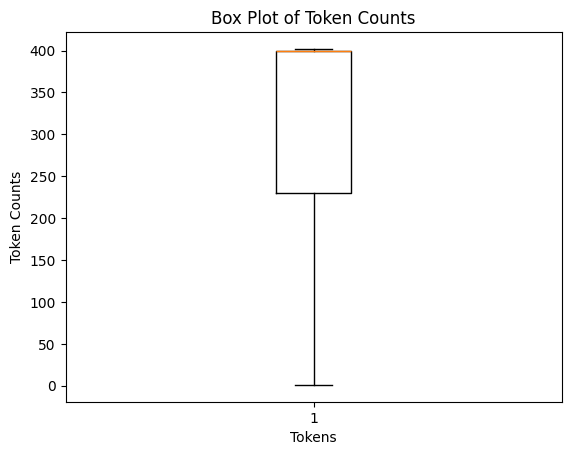

In [12]:
import matplotlib.pyplot as plt

counts = new_train_df['number of tokens']
# Plotting the histogram
plt.boxplot(counts, showfliers=True)
plt.xlabel('Tokens')
plt.ylabel('Token Counts')
plt.title('Box Plot of Token Counts')
plt.show()


In [13]:
# how many texts unded 5?
less_than_5 = new_train_df[new_train_df['number of tokens'] < 5]
less_than_5

,doc_number,split,tokens,labels,number of tokens
199,2651,3,"[de, Bono, \n\n]","[O, O, O]",3
202,2660,2,"[., \n\n]","[O, O]",2
298,3427,5,"[., \n\n]","[O, O]",2
379,3915,3,[\n\n],[O],1
436,4227,2,"[confidentiality, agreement, \n\n]","[O, O, O]",3
450,4295,1,[\n\n],[O],1
490,4433,2,"[., \n\n]","[O, O]",2
603,4956,2,[\n\n],[O],1
1095,7084,1,"[service, ., \n\n]","[O, O, O]",3
1155,7411,1,"[\n\n, Jose, Camacho, \n\n]","[O, B-NAME_STUDENT, I-NAME_STUDENT, O]",4


In [32]:
# save new dataset as csv
new_train_df.to_csv('data/split_tokens_short/train_data_short.csv', index=False)
# save as json
new_train_df.to_json('data/split_tokens_short/train_data_short.json', orient='records', lines=True)

In [15]:
df_exploded = new_train_df.explode('labels')
# Count the occurrences of each unique string
label_counts = df_exploded['labels'].value_counts()

# Display the counts
print(label_counts)

labels
O                   4989794
B-NAME_STUDENT         1365
I-NAME_STUDENT         1096
B-URL_PERSONAL          110
B-ID_NUM                 78
B-EMAIL                  39
I-STREET_ADDRESS         20
I-PHONE_NUM              15
B-USERNAME                6
B-PHONE_NUM               6
B-STREET_ADDRESS          2
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64


In [16]:
label_list = list(label_counts.index)
label_list

['O',
 'B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'B-ID_NUM',
 'B-EMAIL',
 'I-STREET_ADDRESS',
 'I-PHONE_NUM',
 'B-USERNAME',
 'B-PHONE_NUM',
 'B-STREET_ADDRESS',
 'I-URL_PERSONAL',
 'I-ID_NUM']

In [17]:
# not labeled data
labeled_rows = 0
for ls in new_train_df['labels']:
    for i in ls:
        if i.startswith('B'):
            labeled_rows += 1
            break

labeled_rows

1144

In [18]:
# select only the rows with labeled data
# get the idexes of the rows with labeled data
labeled_rows_idx = []
for idx, ls in enumerate(new_train_df['labels']):
    for i in ls:
        if i.startswith('B'):
            labeled_rows_idx.append(idx)
            break
            

len(labeled_rows_idx)


1144

In [19]:
labeled_rows_new_train_df= new_train_df.iloc[labeled_rows_idx]
labeled_rows_new_train_df

,doc_number,split,tokens,labels,number of tokens
0,7,0,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",400
1,7,1,"[of, questions, ,, we, can, use, :, who, ,, wh...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",353
2,10,0,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",400
3,10,1,"[which, eases, the, , work, of, the, team, .,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",163
4,16,0,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...",400
...,...,...,...,...,...
7832,14484,0,"[REFLECTION, :, MIND, MAPPING, \n\n, Challenge...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",400
8983,15717,0,"[Visualization, \n\n, Visualization, refers, t...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",400
8985,15717,2,"[stages, of, design, thinking, ., It, is, a, c...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",400
12347,19280,0,"[Learning, Launch, based, on, Design, Thinking...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",400


In [27]:
len(labeled_rows_new_train_df['tokens'][0])

400

In [20]:
labeled_rows_new_train_df.describe()

,doc_number,split,number of tokens
count,1144.000000,1144.000000,1144.000000
mean,7659.880245,0.438811,364.292832
std,3583.338706,0.834365,84.037950
min,7.000000,0.000000,4.000000
25%,4932.500000,0.000000,400.000000
50%,7766.500000,0.000000,400.000000
75%,10674.500000,1.000000,400.000000
max,20984.000000,8.000000,402.000000


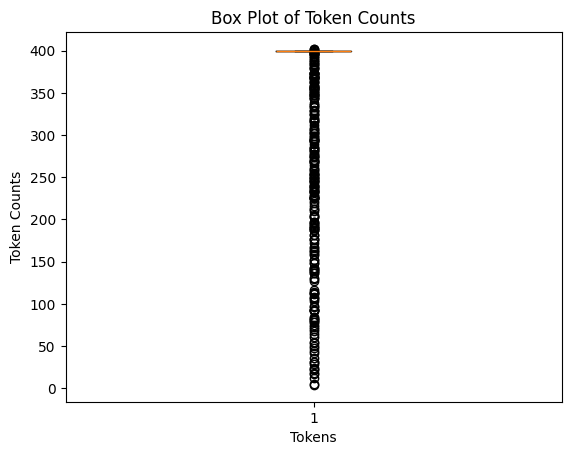

In [21]:
import matplotlib.pyplot as plt

counts = labeled_rows_new_train_df['number of tokens']
# Plotting the histogram
plt.boxplot(counts, showfliers=True)
plt.xlabel('Tokens')
plt.ylabel('Token Counts')
plt.title('Box Plot of Token Counts')
plt.show()

In [22]:
df_exploded = labeled_rows_new_train_df.explode('labels')
# Count the occurrences of each unique string
label_counts = df_exploded['labels'].value_counts()

# Display the counts
print(label_counts)

labels
O                   414012
B-NAME_STUDENT        1365
I-NAME_STUDENT        1096
B-URL_PERSONAL         110
B-ID_NUM                78
B-EMAIL                 39
I-STREET_ADDRESS        20
I-PHONE_NUM             15
B-USERNAME               6
B-PHONE_NUM              6
B-STREET_ADDRESS         2
I-URL_PERSONAL           1
I-ID_NUM                 1
Name: count, dtype: int64
